In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scripts.config import Config
from scripts.model import Model

In [3]:
def poly_area(x, y):
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))


def group_area(group, layout):
    coordinates = [layout.get(node_id) for node_id in group]
    south = min(coordinates, key=lambda x: x[1])
    west = min(coordinates, key=lambda x: x[0])
    north = max(coordinates, key=lambda x: x[1])
    east = max(coordinates, key=lambda x: x[0])
    bbox = [south, west, north, east]
    return poly_area([n[0] for n in bbox], [n[1] for n in bbox])

In [5]:
config = Config()
model = Model(config)
edges, all_nodes = model.get_graph()
layout = {node.id: (float(node.lon), float(node.lat)) for node in all_nodes}

In [6]:
G = nx.Graph(edges)
sorted_groups = sorted(nx.connected_components(G), \
                       key=lambda g: group_area(g, layout), reverse=True)

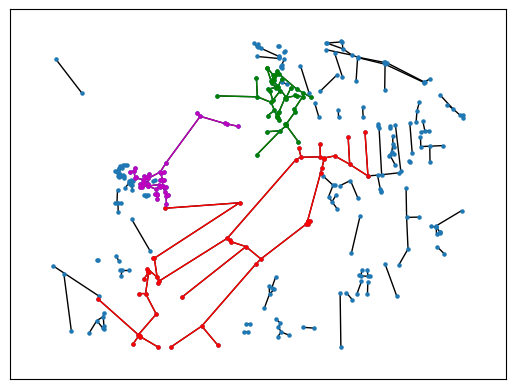

In [7]:
nx.draw_networkx(G, pos=layout, with_labels=False, node_size=5)
nx.draw_networkx(G.subgraph(list(sorted_groups[0])), pos=layout, node_color='r', edge_color='r', with_labels=False,
                 node_size=5)
nx.draw_networkx(G.subgraph(list(sorted_groups[1])), pos=layout, node_color='m', edge_color='m', with_labels=False,
                 node_size=5)
nx.draw_networkx(G.subgraph(list(sorted_groups[2])), pos=layout, node_color='g', edge_color='g', with_labels=False,
                 node_size=5)

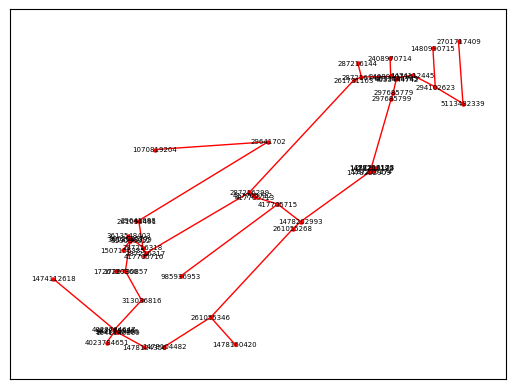

In [19]:
nx.draw_networkx(G.subgraph(list(sorted_groups[0])),
                 pos=layout, node_color='r', edge_color='r',
                 with_labels=True,
                 node_size=5, font_size=5)

In [15]:
G_copy = G.subgraph(G.nodes()).copy()
G_copy.remove_nodes_from([n for n in G if n in set(sorted_groups[0])])

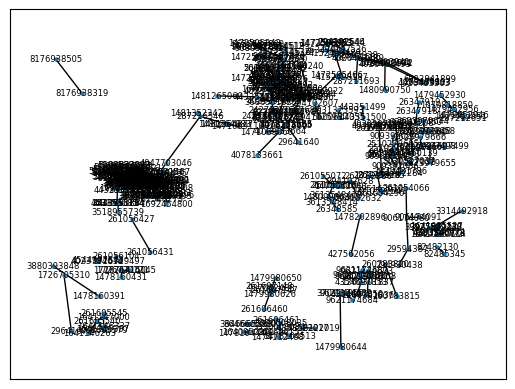

In [17]:
nx.draw_networkx(G_copy, pos=layout, with_labels=True, node_size=5, font_size=6)